Data Wrangling and Data Story in Python for the Capstone Project 1 
Data Set - Mental Health in Tech Survey
Name - Nilay Desai

In [107]:
#import the modules 
import csv
import pandas as pd
import numpy as np
from random import randint
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from array import *
from scipy import stats
from scipy.stats import randint

In [108]:
#create a dataframe to store the data in
#let the system know a column is a date in the read_csv function
df = pd.read_csv('Data/survey.csv')

In [109]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [111]:
#convert datetime to datetime64 type
#look into converting to 
df['Timestamp'] = df['Timestamp'].astype('datetime64[ns]')
type(df['Gender'])

pandas.core.series.Series

In [112]:
df['Timestamp']

0      2014-08-27 11:29:31
1      2014-08-27 11:29:37
2      2014-08-27 11:29:44
3      2014-08-27 11:29:46
4      2014-08-27 11:30:22
5      2014-08-27 11:31:22
6      2014-08-27 11:31:50
7      2014-08-27 11:32:05
8      2014-08-27 11:32:39
9      2014-08-27 11:32:43
10     2014-08-27 11:32:44
11     2014-08-27 11:32:49
12     2014-08-27 11:33:23
13     2014-08-27 11:33:26
14     2014-08-27 11:33:57
15     2014-08-27 11:34:00
16     2014-08-27 11:34:20
17     2014-08-27 11:34:37
18     2014-08-27 11:34:53
19     2014-08-27 11:35:08
20     2014-08-27 11:35:12
21     2014-08-27 11:35:24
22     2014-08-27 11:35:48
23     2014-08-27 11:36:24
24     2014-08-27 11:36:48
25     2014-08-27 11:37:08
26     2014-08-27 11:37:23
27     2014-08-27 11:37:59
28     2014-08-27 11:38:12
29     2014-08-27 11:38:18
               ...        
1229   2015-02-22 02:40:32
1230   2015-02-24 08:54:35
1231   2015-02-24 08:58:08
1232   2015-02-24 09:00:56
1233   2015-02-24 09:13:49
1234   2015-02-24 09:15:13
1

In [113]:
#figure out the distribution first and then determine the mode or random
df.Gender.replace({'Female': 1, 'female': 1, 'f': 1, 'F': 1, 'Male': 0, 'male': 0, 'm': 0, 'M': 0, r'[a-z]+':1}, regex=True, inplace=True)

In [114]:
#create a dictionary to see the kind of values in Country columumns
Countries = {}
for country in df['Country']:
    if country in Countries:
        Countries[country] += 1
    else:
        Countries[country] = 1

In [115]:
Countries
#regions

{'Australia': 21,
 'Austria': 3,
 'Bahamas, The': 1,
 'Belgium': 6,
 'Bosnia and Herzegovina': 1,
 'Brazil': 6,
 'Bulgaria': 4,
 'Canada': 72,
 'China': 1,
 'Colombia': 2,
 'Costa Rica': 1,
 'Croatia': 2,
 'Czech Republic': 1,
 'Denmark': 2,
 'Finland': 3,
 'France': 13,
 'Georgia': 1,
 'Germany': 45,
 'Greece': 2,
 'Hungary': 1,
 'India': 10,
 'Ireland': 27,
 'Israel': 5,
 'Italy': 7,
 'Japan': 1,
 'Latvia': 1,
 'Mexico': 3,
 'Moldova': 1,
 'Netherlands': 27,
 'New Zealand': 8,
 'Nigeria': 1,
 'Norway': 1,
 'Philippines': 1,
 'Poland': 7,
 'Portugal': 2,
 'Romania': 1,
 'Russia': 3,
 'Singapore': 4,
 'Slovenia': 1,
 'South Africa': 6,
 'Spain': 1,
 'Sweden': 7,
 'Switzerland': 7,
 'Thailand': 1,
 'United Kingdom': 185,
 'United States': 751,
 'Uruguay': 1,
 'Zimbabwe': 1}

In [116]:
#create a dictionary to see the kind of values in leaves columumns
leave_difficulty = {}
for leave in df['leave']:
    if leave in leave_difficulty:
        leave_difficulty[leave] += 1
    else:
        leave_difficulty[leave] = 1

In [117]:
leave_difficulty

{"Don't know": 563,
 'Somewhat difficult': 126,
 'Somewhat easy': 266,
 'Very difficult': 98,
 'Very easy': 206}

In [118]:
#convert the list into categorical data
for leave in df['leave']:
    if leave[0] == 'D':
        leave = 5
    elif leave == 'Somewhat difficult':
        leave = 2
    elif leave == 'Somewhat easy':
        leave = 1
    elif leave == 'Very difficult':
        leave = 3
    elif leave == 'Very easy':
        leave = 0

In [119]:
df.leave.head()
#change the order 

0         Somewhat easy
1            Don't know
2    Somewhat difficult
3    Somewhat difficult
4            Don't know
Name: leave, dtype: object

In [120]:
df.leave.replace({'Somewhat difficult': 2, 'Somewhat easy': 1, 'Very difficult': 3, 'Very easy': 0, 'Don\'t know': 4}, inplace=True)

In [121]:
#df.leave
#sklearn.preprocessing label encoding

In [122]:
#create a dictionary to see the kind of values in number of employees columumns
no_employees = {}
for num in df['no_employees']:
    if num in no_employees:
        no_employees[num] += 1
    else:
        no_employees[num] = 1

In [123]:
no_employees
#keep the order ascending

{'1-5': 162,
 '100-500': 176,
 '26-100': 289,
 '500-1000': 60,
 '6-25': 290,
 'More than 1000': 282}

In [124]:
df.no_employees.replace({'1-5': 0, '100-500': 3, '26-100': 2, '500-1000': 4, '6-25': 1, 'More than 1000': 5}, inplace=True)

In [125]:
#df.seek_help
#classify 3 things - no missing in target variables 
#multi class classification 

In [126]:
#countries can be used but states are tough HIGH CARDINALITY
#turn them into numbers (label encoding) 
#

In [127]:
#create a dictionary to see the kind of values in family history columumns
family_history = {}
for history in df['family_history']:
    if history in family_history:
        family_history[history] += 1
    else:
        family_history[history] = 1

In [128]:
family_history

{'No': 767, 'Yes': 492}

In [129]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

In [130]:
df[['family_history', 'treatment']].shape

(1259, 2)

In [131]:
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns without N/A
df[['family_history', 'treatment', 'remote_work', 'tech_company']] = df[['family_history', 'treatment', 'remote_work', 'tech_company']].apply(le.fit_transform)

In [132]:
#deleting the column comments
df = df.drop(columns='comments')

In [133]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,1,United States,IL,NaN,0,1,Often,1,...,Yes,1,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,0,United States,IN,NaN,0,0,Rarely,5,...,Don't know,4,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,0,Canada,NaN,NaN,0,0,Rarely,1,...,Don't know,2,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,0,United Kingdom,NaN,NaN,1,1,Often,2,...,No,2,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,0,United States,TX,NaN,0,0,Never,3,...,Don't know,4,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [134]:
#create a dictionary to see the kind of values in self_employed columumns
self_employed = {}
for option in df['self_employed']:
    if option in self_employed:
        self_employed[option] += 1
    else:
        self_employed[option] = 1

In [135]:
self_employed

{'No': 1095, 'Yes': 146, nan: 18}

In [136]:
#create a dictionary to see the kind of values in work_interfere columumns
work_interfere = {}
for work in df['work_interfere']:
    if work in work_interfere:
        work_interfere[work] += 1
    else:
        work_interfere[work] = 1

In [137]:
work_interfere
#look into this whether its missing or just another category

{'Never': 213, 'Often': 144, 'Rarely': 173, 'Sometimes': 465, nan: 264}

In [138]:
#create a dictionary to see the kind of values in benefits columumns
benefits = {}
for benefit in df['benefits']:
    if benefit in benefits:
        benefits[benefit] += 1
    else:
        benefits[benefit] = 1

In [139]:
benefits

{"Don't know": 408, 'No': 374, 'Yes': 477}

In [140]:
#create a dictionary to see the kind of values in care_options columumns
care_options = {}
for care in df['care_options']:
    if care in care_options:
        care_options[care] += 1
    else:
        care_options[care] = 1

In [141]:
care_options

{'No': 501, 'Not sure': 314, 'Yes': 444}

In [142]:
#create a dictionary to see the kind of values in wellness_program columumns
wellness_program = {}
for program in df['wellness_program']:
    if program in wellness_program:
        wellness_program[program] += 1
    else:
        wellness_program[program] = 1

In [143]:
wellness_program

{"Don't know": 188, 'No': 842, 'Yes': 229}

In [144]:
#create a dictionary to see the kind of values in seek_help columumns
seek_help = {}
for options in df['seek_help']:
    if options in seek_help:
        seek_help[options] += 1
    else:
        seek_help[options] = 1

In [145]:
seek_help

{"Don't know": 363, 'No': 646, 'Yes': 250}

In [146]:
#create a dictionary to see the kind of values in anonymity columumns
anonymity = {}
for options in df['anonymity']:
    if options in anonymity:
        anonymity[options] += 1
    else:
        anonymity[options] = 1

In [147]:
anonymity

{"Don't know": 819, 'No': 65, 'Yes': 375}

In [148]:
#create a dictionary to see the kind of values in mental_health_consequence columumns
mental_health_consequence = {}
for options in df['mental_health_consequence']:
    if options in mental_health_consequence:
        mental_health_consequence[options] += 1
    else:
        mental_health_consequence[options] = 1

In [149]:
mental_health_consequence

{'Maybe': 477, 'No': 490, 'Yes': 292}

In [150]:
#create a dictionary to see the kind of values in phys_health_consequence columumns
phys_health_consequence = {}
for options in df['phys_health_consequence']:
    if options in phys_health_consequence:
        phys_health_consequence[options] += 1
    else:
        phys_health_consequence[options] = 1

In [151]:
phys_health_consequence

{'Maybe': 273, 'No': 925, 'Yes': 61}

In [152]:
#create a dictionary to see the kind of values in coworkers columumns
coworkers = {}
for options in df['coworkers']:
    if options in coworkers:
        coworkers[options] += 1
    else:
        coworkers[options] = 1

In [153]:
coworkers

{'No': 260, 'Some of them': 774, 'Yes': 225}

In [154]:
#create a dictionary to see the kind of values in supervisor columumns
supervisor = {}
for options in df['supervisor']:
    if options in supervisor:
        supervisor[options] += 1
    else:
        supervisor[options] = 1

In [155]:
supervisor

{'No': 393, 'Some of them': 350, 'Yes': 516}

In [156]:
#create a dictionary to see the kind of values in mental_health_interview columumns
mental_health_interview = {}
for options in df['mental_health_interview']:
    if options in mental_health_interview:
        mental_health_interview[options] += 1
    else:
        mental_health_interview[options] = 1

In [157]:
mental_health_interview

{'Maybe': 207, 'No': 1008, 'Yes': 44}

In [158]:
#create a dictionary to see the kind of values in phys_health_interview columumns
phys_health_interview = {}
for options in df['phys_health_interview']:
    if options in phys_health_interview:
        phys_health_interview[options] += 1
    else:
        phys_health_interview[options] = 1

In [159]:
phys_health_interview

{'Maybe': 557, 'No': 500, 'Yes': 202}

In [160]:
#create a dictionary to see the kind of values in mental_vs_physical columumns
mental_vs_physical = {}
for options in df['mental_vs_physical']:
    if options in mental_vs_physical:
        mental_vs_physical[options] += 1
    else:
        mental_vs_physical[options] = 1

In [161]:
mental_vs_physical

{"Don't know": 576, 'No': 340, 'Yes': 343}

In [162]:
#create a dictionary to see the kind of values in obs_consequences columumns
obs_consequence = {}
for options in df['obs_consequence']:
    if options in obs_consequence:
        obs_consequence[options] += 1
    else:
        obs_consequence[options] = 1

In [163]:
obs_consequence

{'No': 1075, 'Yes': 184}

In [164]:
# 2. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le_2 = preprocessing.LabelEncoder()

In [165]:
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns without N/A


In [166]:
df[['obs_consequence', 'mental_vs_physical']] = df[['obs_consequence', 'mental_vs_physical']].apply(le_2.fit_transform)

In [167]:
df[['phys_health_interview', 'mental_health_interview']] = df[['phys_health_interview', 'mental_health_interview']].apply(le_2.fit_transform)

In [168]:
df[['coworkers', 'supervisor', 'anonymity']] = df[['coworkers', 'supervisor', 'anonymity']].apply(le_2.fit_transform)

In [169]:
df[['phys_health_consequence', 'mental_health_consequence', 'seek_help', 'benefits', 'care_options', 'wellness_program']] = df[['phys_health_consequence', 'mental_health_consequence', 'seek_help', 'benefits', 'care_options', 'wellness_program']].apply(le_2.fit_transform)

In [170]:
#taking care of NANs for self employed. assuming "No" for all NAs
df['self_employed'].fillna(value='No', inplace=True)

In [171]:
df[['self_employed']] = df[['self_employed']].apply(le_2.fit_transform)

In [172]:
df['work_interfere'].fillna(value='Don\'t know', inplace=True)

In [173]:
df[['work_interfere']] = df[['work_interfere']].apply(le_2.fit_transform)

In [174]:
#deleting the state comments
df = df.drop(columns='state')

In [175]:
df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,1,United States,0,0,1,2,1,0,...,2,1,1,1,1,2,1,0,2,0
1,2014-08-27 11:29:37,44,0,United States,0,0,0,3,5,0,...,0,4,0,1,0,0,1,1,0,0
2,2014-08-27 11:29:44,32,0,Canada,0,0,0,3,1,0,...,0,2,1,1,2,2,2,2,1,0
3,2014-08-27 11:29:46,31,0,United Kingdom,0,1,1,2,2,0,...,1,2,2,2,1,0,0,0,1,1
4,2014-08-27 11:30:22,31,0,United States,0,0,0,1,3,1,...,0,4,1,1,1,2,2,2,0,0


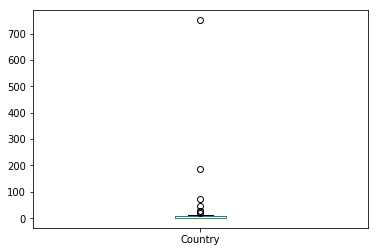

In [176]:
df['Country'].value_counts().plot(kind='box')
#directly label encoding
#another approach top 10 and then 
#frequencies
#top 10 states 
#US canada Europe

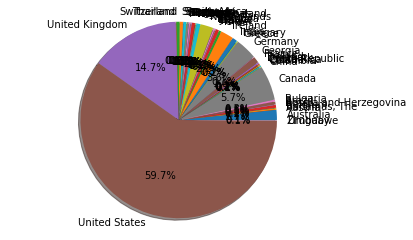

In [177]:
labels = df['Country'].astype('category').cat.categories.tolist()
counts = df['Country'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [178]:
c = {}
for options in df['obs_consequence']:
    if options in obs_consequence:
        obs_consequence[options] += 1
    else:
        obs_consequence[options] = 1

In [179]:
df[['Country']] = df[['Country']].apply(le_2.fit_transform)

In [180]:
#complete missing age 
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s

#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [181]:
df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,2014-08-27 11:29:31,37,1,45,0,0,1,2,1,0,...,1,1,1,1,2,1,0,2,0,31-65
1,2014-08-27 11:29:37,44,0,45,0,0,0,3,5,0,...,4,0,1,0,0,1,1,0,0,31-65
2,2014-08-27 11:29:44,32,0,7,0,0,0,3,1,0,...,2,1,1,2,2,2,2,1,0,31-65
3,2014-08-27 11:29:46,31,0,44,0,1,1,2,2,0,...,2,2,2,1,0,0,0,1,1,31-65
4,2014-08-27 11:30:22,31,0,45,0,0,0,1,3,1,...,4,1,1,1,2,2,2,0,0,31-65


In [182]:
#to print the unique values in a data series
#print(df['work_interfere'].unique())

In [183]:
df[['age_range']] = df[['age_range']].apply(le_2.fit_transform)

In [184]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age_range                      0      0.0
obs_consequence                0      0.0
Age                            0      0.0
Gender                         0      0.0
Country                        0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0  

In [185]:
#deleting the age comments
df = df.drop(columns='Timestamp')

In [186]:
df.head()df.benefits.head()

SyntaxError: invalid syntax (<ipython-input-186-6c898fe06bae>, line 1)

In [ ]:
#Questions 
#what is the distribution of age
#what is the distribution of gender
#what is the age and treatment distribution
#further separate it into gender
#what is the relationship between family history and treatment between genders
#what is the relationship between work interference and treatment
#what is the relationship between care_options and treatment


In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
#distribution looks normal little right skewed, plotted the ecdf to confirm
x,y = ecdf(df['Age'])
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')


# Display the plot
plt.show()

sns.distplot(df['Age'], hist=True, kde=True, color = 'darkblue', 
             bins=48, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [ ]:
a = sns.countplot(x="Gender", data=df);
a.set_xticklabels(['male', 'female'])
#significantly higher number of males as expected in the tech industry

In [ ]:
b = sns.countplot(x="treatment", data=df);
b.set_xticklabels(['yes', 'no'])

In [ ]:
# Separate by treatment or not and by gender
g = sns.FacetGrid(df, col='treatment', row='Gender', size=5)
g = g.map(sns.distplot, "Age")

In [ ]:
# Separate by treatment or not and by gender
f = sns.FacetGrid(df, col='treatment', row='family_history', size=5)
f = f.map(sns.distplot, "Age")

In [ ]:
g = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

g.set_xticklabels(['0-20', '21-30', '31-65', '66-100'])

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)


plt.show()

In [ ]:
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar", size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family history')

g.set_xticklabels(['No', 'Yes'])

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

In [ ]:
#df.care_options
#not sure = 1
#no = 0
#yes = 2
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('care_options')

g.set_xticklabels(['No', 'Not Sure', 'Yes'])
# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

In [ ]:
#2 - Yes
#0 - dont know
#1 - no
g = sns.factorplot(x="benefits", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

g.set_xticklabels(['Don\'t Know', 'No', 'Yes'])
# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

In [ ]:
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('work interfere')

g.set_xticklabels(['NA', 'Never', 'Often', 'Rarely', 'Sometimes'])
# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()
#work interference
#0 - NA
#1 - Never
#2 - Often
#3 - Rarely
#4 - Sometimes

In [ ]:
"""
correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)plt.show()"""

In [ ]:
#process of testing the hypothesis by performing chi square on 
freq_family_hist = np.sort(df.family_history)
counts_fam = collections.Counter(freq_family_hist)
counts_fam

In [ ]:
freq_treatment = np.sort(df.treatment)
counts_treatment = collections.Counter(freq_treatment)
counts_treatment

In [ ]:
table = [[767, 492], [622,637]]

In [ ]:
stat, p, dof, expected = stats.chi2_contingency(table, correction=False)

In [ ]:
stat

In [ ]:
p
#reject null hypothesis that family history and treatment are independent 
#Ha: not independent 

In [ ]:
dof

In [ ]:
expected